In [119]:
import numpy as np
import pandas as pd
import sys
import warnings
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
plt.style.use('ggplot')

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [14]:
from sklearn.mixture import GMM
data_path = './data/'

In [15]:
df_feature =pd.read_csv(data_path + 'Air_Feature.csv', index_col= [0, 1])

In [16]:
import seaborn as sns
from ggplot import *
from sklearn.manifold import TSNE

In [290]:
df_feat = df_feature.iloc[:, :-9]
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3000, method='exact')
tsne_results = tsne.fit_transform(df_feature)

df_tsne = df_feature.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 752 / 752
[t-SNE] Mean sigma: 1.262009
[t-SNE] KL divergence after 100 iterations with early exaggeration: 11.613304
[t-SNE] Error after 200 iterations: 11.613304


Text(26.4184,0.5,'Dimension 2')

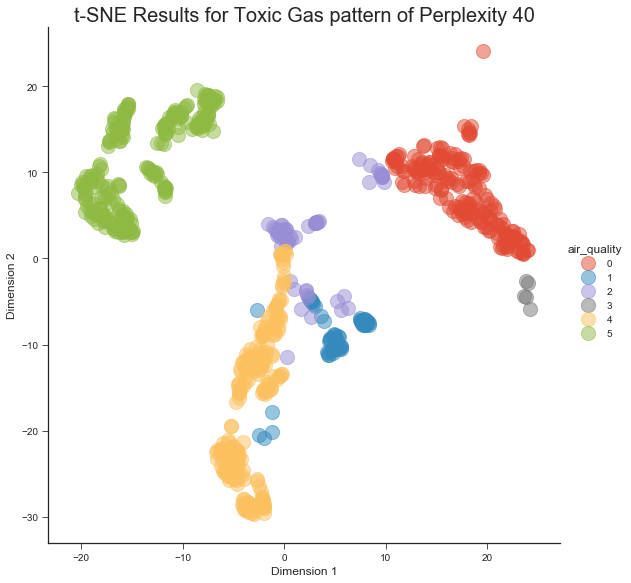

In [291]:
sns.set_style('ticks')

sns.lmplot(x = 'x-tsne',
           y = 'y-tsne',
           size = 8,
           data = df_tsne,
           scatter_kws = {'s':200, 'alpha':0.5},
           fit_reg = False,
           legend = True,
           hue = 'air_quality')

plt.title('t-SNE Results for Toxic Gas pattern of Perplexity 40', fontsize = 20)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

* GMM clustering

In [117]:
n_components = np.arange(1, 15)
models = [GMM(n, covariance_type='full', random_state=0).fit(df_feat)
          for n in n_components]


Text(0.5,0,'n_components')

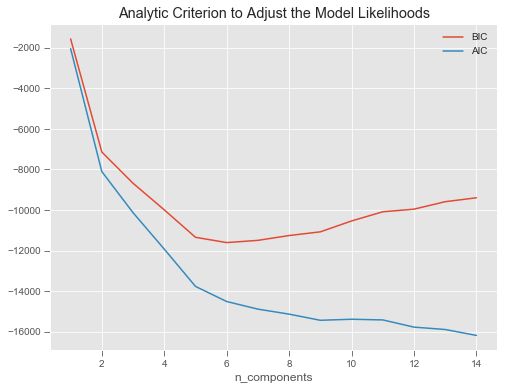

In [120]:
plt.figure(figsize = (8,6))
plt.title('Analytic Criterion to Adjust the Model Likelihoods')
plt.plot(n_components, [m.bic(df_feat) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_feat) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [247]:
gmm_mod = models[5]

In [248]:
df_feature['air_quality'] = gmm_mod.predict(df_feat)

#### Air Quality Type with aqi index

In [296]:
df_aqi = pd.read_csv(data_path + 'AQI_index.csv').iloc[:, 1:].set_index(['State', 'Year'])

In [297]:
df_general =pd.merge(df_feature, df_aqi, on = ['State', 'Year'])

In [298]:
df_quality = df_general.groupby('air_quality')[['Max AQI', 'Median AQI']].mean()

Text(0.5,0,'AQI Index')

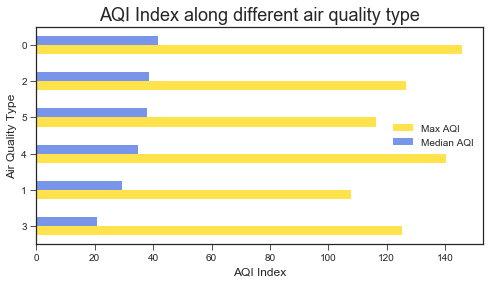

In [299]:
ax = df_quality.sort_values('Median AQI').plot(kind = 'barh', color = ['gold', 'royalblue'],
                                            figsize = (8,4), alpha = 0.7)
ax.set_title('AQI Index along different air quality type', fontsize = 18)
ax.set_ylabel('Air Quality Type')
ax.set_xlabel('AQI Index') 


In [300]:
df_general.to_csv('general_air.csv')